<a href="https://colab.research.google.com/github/031wnstjd/Deep-Learning/blob/master/DL_Midterm_4_layer_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 중간고사

In [ ]:
name = input("Name :")
ID = input("student ID :")

Name :추준성
student ID :2016145028


아래와 같은 4-layer MLP를 완성하시오

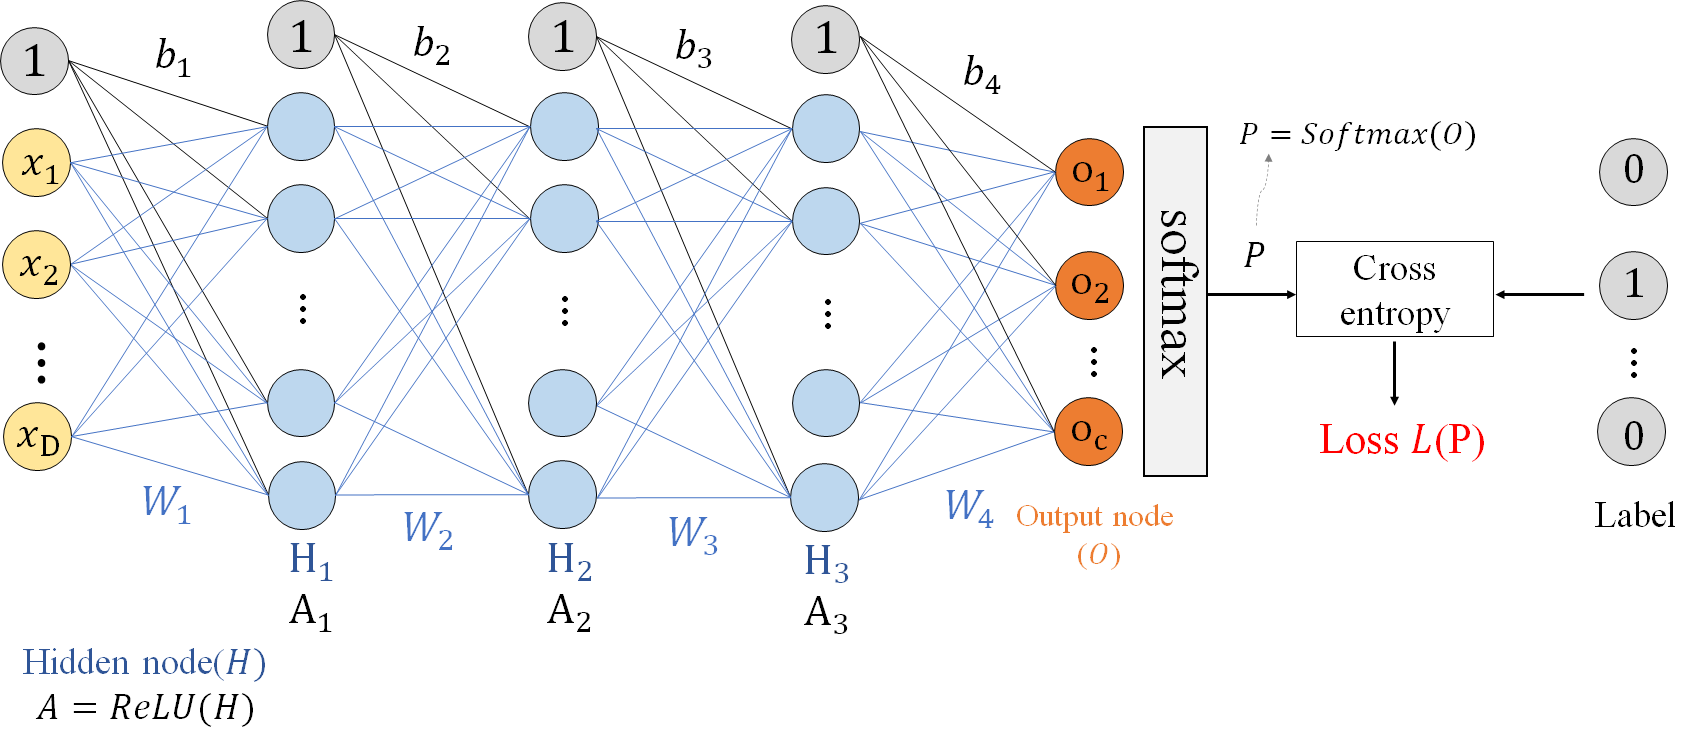

## CIFAR10 classification - tensor implementation

### Data

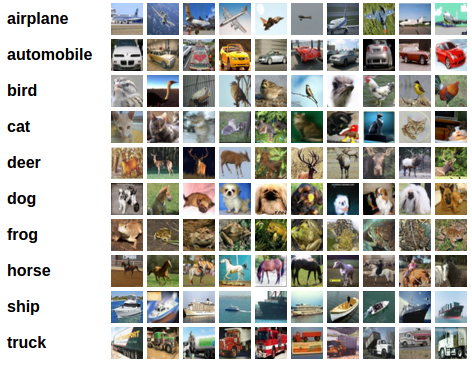

```CIFAR10``` :  The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.</br></br> target :‘비행기(airplane)’, ‘자동차(automobile)’, ‘새(bird)’, ‘고양이(cat)’, ‘사슴(deer)’, ‘개(dog)’, ‘개구리(frog)’, ‘말(horse)’, ‘배(ship)’, ‘트럭(truck)’

In [ ]:
from keras.datasets import cifar10
import numpy as np
from matplotlib import pyplot as plt
import torch

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("shape of x_train :",x_train.shape)
print("shape of y_train :",y_train.shape)
print("shape of x_test :",x_test.shape)
print("shape of y_test :",y_test.shape)

170508288/170498071 [==============================] - 17s 0us/step
shape of x_train : (50000, 32, 32, 3)
shape of y_train : (50000, 1)
shape of x_test : (10000, 32, 32, 3)
shape of y_test : (10000, 1)


In [ ]:
def preprocessing_data(x_train, x_test, y_train, y_test):
    x_train = x_train[:5000]
    y_train = y_train[:5000]
    x_test = x_test[:1000]
    y_test = y_test[:1000]

    x_train = torch.from_numpy(x_train).cuda()
    x_test = torch.from_numpy(x_test).cuda()

    x_train = torch.tensor(x_train,dtype=torch.float64, device="cuda:0")
    y_train = torch.tensor(y_train,device="cuda:0")

    x_test = torch.tensor(x_test,dtype=torch.float64,device="cuda:0")
    y_test = torch.tensor(y_test,device="cuda:0")
    

    x_train = x_train.reshape([x_train.shape[0],-1])
    x_test = x_test.reshape(x_test.shape[0],-1)

    y_train = y_train.squeeze(1)
    y_test = y_test.squeeze(1)


    mean_value = torch.mean(x_train, dim=0)
    x_train -= mean_value
    x_train = x_train/255
    x_test -= mean_value
    x_test = x_test/255

    
    return x_train, x_test, y_train, y_test

In [ ]:
x_train, x_test, y_train, y_test = preprocessing_data(x_train, x_test, y_train, y_test)

### 4-layer MLP

In [ ]:
import torch

class TwoLayerNet:
  def __init__(self, input_size, hidden_size_1, hidden_size_2, hidden_size_3, output_size):
    self.params = {}
    torch.manual_seed(50)
    
    std=1e-1
    self.params["W1"] = torch.normal(0, std, size=(input_size, hidden_size_1),device="cuda:0").type(torch.cuda.DoubleTensor) # W1은 input_size x hidden_size_1 꼴의 행렬
    self.params["b1"] = torch.normal(0, std, size=(1, hidden_size_1),device="cuda:0").type(torch.cuda.DoubleTensor) # b1은 1 x hidden_size_1 꼴의 행렬
    
    self.params["W2"] = torch.normal(0, std, size=(hidden_size_1, hidden_size_2),device="cuda:0").type(torch.cuda.DoubleTensor) # W2는 hidden_size_1 x hidden_size_2 꼴의 행렬
    self.params["b2"] = torch.normal(0, std, size=(1, hidden_size_2),device="cuda:0").type(torch.cuda.DoubleTensor) # b2는 1 x hidden_size_2 꼴의 행렬
    
    self.params["W3"] = torch.normal(0, std, size=(hidden_size_2, hidden_size_3),device="cuda:0").type(torch.cuda.DoubleTensor) # W3는 hidden_size2 x hidden_size_3 꼴의 행렬
    self.params["b3"] = torch.normal(0, std, size=(1, hidden_size_3),device="cuda:0").type(torch.cuda.DoubleTensor) # b3는 1 x hidden_size_3 꼴의 행렬
    
    self.params["W4"] = torch.normal(0, std, size=(hidden_size_3, output_size),device="cuda:0").type(torch.cuda.DoubleTensor) # W4는 hidden_size_3 x output_size 꼴의 행렬
    self.params["b4"] = torch.normal(0, std, size=(1, output_size),device="cuda:0").type(torch.cuda.DoubleTensor) # b4는 1 x output_size 꼴의 행렬

  
  def forward(self, X, y = None):
    """
    X : input 데이터 (N, D)
    y : label (N)
    """

    W1, b1 = self.params["W1"], self.params["b1"]
    W2, b2 = self.params["W2"], self.params["b2"]
    W3, b3 = self.params["W3"], self.params["b3"]
    W4, b4 = self.params["W4"], self.params["b4"]

    h1 = torch.matmul(X, W1) + b1 # first hidden layer의 노드 값들 계산
    a1 = h1*(h1>0) # first hidden layer의 노드들에 ReLU 함수 적용
    h2 = torch.matmul(a1, W2) + b2 # second hidden layer의 노드 값들 계산
    a2 = h2*(h2>0) # second hidden layer의 노드들에 ReLU 함수 적용
    h3 = torch.matmul(a2, W3) + b3 # third hidden layer의 노드 값들 계산
    a3 = h3*(h3>0) # third hidden layer의 노드들에 ReLU 함수 적용

    o = torch.matmul(a3, W4) + b4 # output layer의 노드 값들 계산
    p = torch.exp(o)/torch.sum(torch.exp(o),axis=1).reshape(-1,1) # softmax 함수 적용한 결과 값



    if y is None:
      return p, a1, a2, a3 # y값(=target)이 없을 땐(=test가 아닌 training 할 때) forward 함수는 학습을 위해 p, a1, a2, a3값들을 반환(backward 함수에서 학습에 사용하기 윟마)

    
    Loss = 0
    # y값(=target)이 있을 땐 Loss를 계산하여 반환
    for i in range(p.shape[0]): # input 데이터가 N개 들어온다면, p.shape[0] == N
      for j in range(p.shape[1]): # p.shape[1] == 10 (클래스 종류의 개수가 10이기 때문) 
        if y[i] == j: # 정답일 때만(어차피 정답이 아닐 땐 label 값이 0이므로 정답일 때만 계산)
          Loss -= torch.log(p[i][j]) # 데이터 하나 당 발생하는 크로스 엔트로피 값 N개를 누적(N개의 데이터 각각의 Loss를 누적해서 계산)
    Loss = Loss/X.shape[0] # X.shape[0] == N : 입력 데이터의 개수, 따라서 Loss/X.shape[0]은 누적한 Loss값의 평균을 의미

    return Loss.cuda() # Loss 값을 gpu 연산하기 위해 cuda에 올리고 이를 반환


  def backward(self, X, y, learning_rate=1e-5):
      """
      X: input 데이터 (N, D)
      y: 레이블 (N)
      grads에는 Loss에 대한 W1, b1, W2, b2 미분 값이 기록됩니다.
      원래 backw 미분 결과를 return 하지만
      여기서는 Gradient Descent방식으로 가중치 갱신까지 합니다.
      """
      W1, b1 = self.params["W1"], self.params["b1"]
      W2, b2 = self.params["W2"], self.params["b2"]
      W3, b3 = self.params["W3"], self.params["b3"]
      W4, b4 = self.params["W4"], self.params["b4"]

      grads = {}

      p, a1, a2, a3 = self.forward(X) # forward 함수로부터 p, a1, a2, a3를 반환 받음(backward 연산에 사용하기 위함)

      dp = p # Loss를 Output으로 편미분한 값, 즉 P-T를 T=0일 때로 초기화(: 정답이 아닐 때에 해당, 즉 원핫인코딩 된 label 값이 0일 때에 해당)
      # 정답일 때, 즉 원핫인코딩 된 label 값이 1일 때는 dp = p-y = p-1로 재할당
      for i in range(p.shape[0]):
          for j in range(p.shape[1]):
            if j==y[i]: #일치 or 불일치
                dp[i][j] -= 1 # p-y

      #step function = ReLU미분 => backward 연산을 진행하려면 ReLU의 미분값이 필요
      da1 = torch.heaviside(a1, values=torch.tensor(0,dtype=torch.float64))
      da2 = torch.heaviside(a2, values=torch.tensor(0,dtype=torch.float64))
      da3 = torch.heaviside(a3, values=torch.tensor(0,dtype=torch.float64))
      
      # 각 파라미터에 대한 미분 값 저장 => 가중치 갱신 계산에 활용하기 위함
      grads["W4"] = torch.matmul(a3.T,dp)
      grads["b4"] = torch.sum(dp,dim =0)/X.shape[0] # bias의 경우, backward 계산을 위해서 shape을 (N, c) => (1, c)로 바꾸어줘야 하므로 각 열의 데이터들을 다 더한 후 데이터의 개수 N으로 나누어줘야 함
      grads["W3"] = torch.matmul(a2.T, da3*torch.matmul(dp,W4.T))
      grads["b3"] = torch.sum(da3*torch.matmul(dp,W4.T),dim =0)/X.shape[0]

      db3 = da3*torch.matmul(dp,W4.T)
      dh2 = da2*torch.matmul(db3,W3.T)
      grads["W2"] = torch.matmul(a1.T, dh2)
      grads["b2"] = torch.sum(dh2, dim=0)/X.shape[0]

      dh1 = da1*torch.matmul(dh2,W2.T)
      grads["W1"] = torch.matmul(X.T, dh1)
      grads["b1"] = torch.sum(dh1, dim=0)/X.shape[0]

      # 각 파라미터에 대해 learning rate와 파라미터의 미분을 곱한 값만큼 빼줌(=가중치 갱신)
      self.params["W4"] -= learning_rate * grads["W4"]
      self.params["b4"] -= learning_rate * grads["b4"]
      self.params["W3"] -= learning_rate * grads["W3"]
      self.params["b3"] -= learning_rate * grads["b3"]
      self.params["W2"] -= learning_rate * grads["W2"]
      self.params["b2"] -= learning_rate * grads["b2"]
      self.params["W1"] -= learning_rate * grads["W1"]
      self.params["b1"] -= learning_rate * grads["b1"]

  def accuracy(self, X, y):

      p, _, _, _ = self.forward(X)

      pred = torch.argmax(p,dim=1) # 데이터 개수가 N개라면 p가 (N, 10) 행렬이므로, torch.argmax(p, dim=1)은 N개의 데이터들 각각에 대해 10개의 클래스 중 가장 확률값이 큰 것의 인덱스를 반환받음
      acc = torch.sum(pred==y).float()/X.shape[0]*100 # 정답(:'pred==y'이라면)이라면 1을 계속 더하고, X.shape[0] = N으로 나눔 => 즉 accuracy 계산

      return acc

### Hyperparameter

In [ ]:
hidden_size_1 = 50 # first hidden layer의 weight 개수
hidden_size_2 = 50 # second hidden layer의 weight 개수
hidden_size_3 = 50 # third hidden layer의 weight 개수

epoch_size = 100 # 반복 횟수
batch_size = 32 # n개의 train data 중에서 학습 시킬 batch size 개수만큼 뽑아서 보는 것
learning_rate = 1e-4 # 얼마만큼 step을 이동하면서 weight을 갱신할지에 learning rate를 설정

### Training

In [ ]:
import numpy as np

N = x_train.shape[0] # 데이터의 개수
input_size = x_train.sahpe[1] # input의 개수 => 3 * 32 * 32 = 3072 (RGB 데이터이므로 채널 수가 세 개이므로 32*32에 3을 곱함)
output_size = 10 # 클래스의 종류가 총 10개 이므로

nn = TwoLayerNet(input_size, hidden_size_1, hidden_size_2, hidden_size_3, output_size=output_size)

history = {'val_acc': [],'val_loss': []}

for i in range(epoch_size):
    random_batch = np.random.permutation(N)
    for j in range(N//batch_size):
        batch_mask = random_batch[j*batch_size:(j+1)*batch_size]
        x_batch = x_train[batch_mask]
        t_batch = y_train[batch_mask]
        nn.backward(x_batch, t_batch, learning_rate) 

    history["val_acc"].append(nn.accuracy(x_test, y_test))
    history["val_loss"].append(nn.forward(x_test, y_test))

    
    if i % 11 # i가 11의 배수일 때마다 accuracy 출력해서 보기 => epoch_size가 100이므로 총 9번 출력
      print(i, "test accuracy :", nn.accuracy(x_test, y_test).item())
      print(i, "test loss     :", nn.forward(x_test, y_test).item())
      print("============================================")

### Visualization

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')
plt.ylabel('Validation Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

plt.show()

print("나의 최고 test accuracy : ",max(history['val_acc']))